In [47]:
library(readxl)

In [48]:
retail_sales<-read_excel("D:\\Datasets\\New_folder_(2)\\MRTS_Retail_Trade_Sales_Data.xlsx")
print(retail_sales)

# A tibble: 341 x 7
   per_idx cat_idx dt_idx et_idx geo_idx is_adj    val
     <dbl>   <dbl>  <dbl>  <dbl>   <dbl>  <dbl>  <dbl>
 1       1       5      1      0       1      0 130683
 2       2       5      1      0       1      0 131244
 3       3       5      1      0       1      0 142488
 4       4       5      1      0       1      0 147175
 5       5       5      1      0       1      0 152420
 6       6       5      1      0       1      0 151849
 7       7       5      1      0       1      0 152586
 8       8       5      1      0       1      0 152476
 9       9       5      1      0       1      0 148158
10      10       5      1      0       1      0 155987
# ... with 331 more rows


In [49]:
retail_sales_values<-retail_sales$val
print(retail_sales_values)

  [1] 130683 131244 142488 147175 152420 151849 152586 152476 148158 155987
 [11] 154824 191347 137020 134462 153025 158615 163519 162964 164590 163989
 [21] 159298 163992 169980 206174 145276 146332 173562 170795 175527 178509
 [31] 173198 182445 175128 178642 184272 221549 158004 155156 181910 176635
 [41] 190269 191609 182909 193370 182521 184276 193405 227552 167372 173941
 [51] 191851 191886 205797 196842 197140 204270 189424 201927 203621 237478
 [61] 181073 178428 203750 199219 211516 205491 208856 211952 201415 210145
 [71] 207533 249389 187445 183767 207973 212262 221155 220867 217687 216605
 [81] 208915 220499 218969 265618 196810 199451 230230 227109 237462 236830
 [91] 236992 240478 230665 233193 240857 293013 213709 227087 253717 239051
[101] 257581 255066 244445 257487 243624 245167 252145 294197 226791 223971
[111] 253439 249062 268658 260315 251504 266460 236210 265188 262004 298666
[121] 230546 228084 257133 257357 271682 260385 266795 277716 246350 259945
[131] 263738

In [50]:
retail_sales_ts<-ts(retail_sales_values,frequency=12,start=c(1992,1))
print(retail_sales_ts)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1992 130683 131244 142488 147175 152420 151849 152586 152476 148158 155987
1993 137020 134462 153025 158615 163519 162964 164590 163989 159298 163992
1994 145276 146332 173562 170795 175527 178509 173198 182445 175128 178642
1995 158004 155156 181910 176635 190269 191609 182909 193370 182521 184276
1996 167372 173941 191851 191886 205797 196842 197140 204270 189424 201927
1997 181073 178428 203750 199219 211516 205491 208856 211952 201415 210145
1998 187445 183767 207973 212262 221155 220867 217687 216605 208915 220499
1999 196810 199451 230230 227109 237462 236830 236992 240478 230665 233193
2000 213709 227087 253717 239051 257581 255066 244445 257487 243624 245167
2001 226791 223971 253439 249062 268658 260315 251504 266460 236210 265188
2002 230546 228084 257133 257357 271682 260385 266795 277716 246350 259945
2003 242271 233478 264532 265990 281482 271242 279323 285212 265331 273781
2004 252818 253689 287944

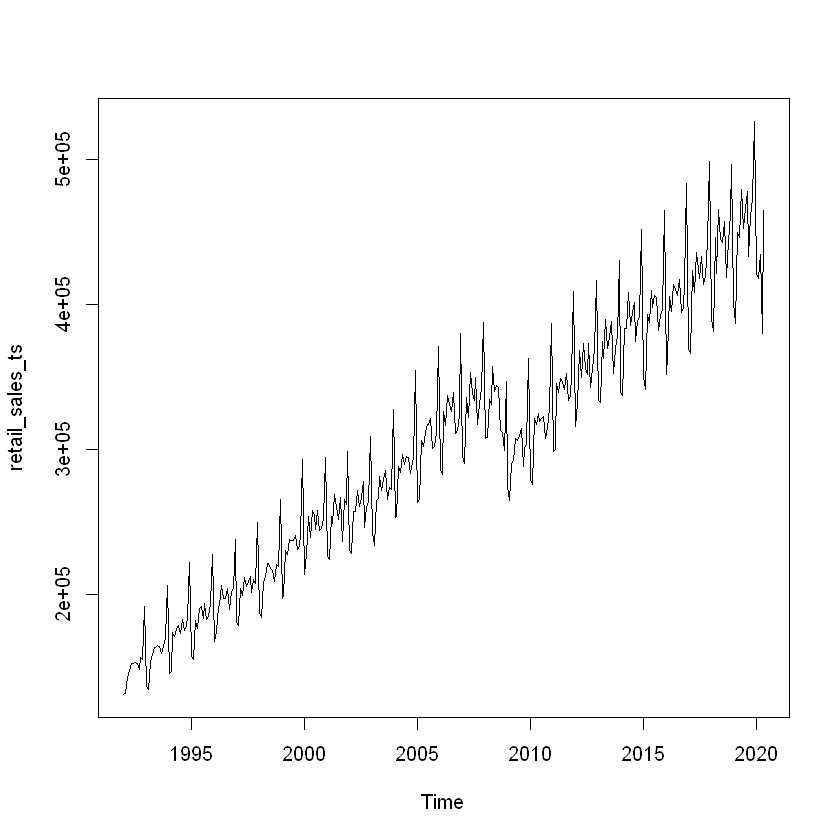

In [51]:
plot(retail_sales_ts)

We can see that there is a linear trend

In [52]:
retail_sales_ts_components<-decompose(retail_sales_ts,type="mult")
print(retail_sales_ts_components)

$x
        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1992 130683 131244 142488 147175 152420 151849 152586 152476 148158 155987
1993 137020 134462 153025 158615 163519 162964 164590 163989 159298 163992
1994 145276 146332 173562 170795 175527 178509 173198 182445 175128 178642
1995 158004 155156 181910 176635 190269 191609 182909 193370 182521 184276
1996 167372 173941 191851 191886 205797 196842 197140 204270 189424 201927
1997 181073 178428 203750 199219 211516 205491 208856 211952 201415 210145
1998 187445 183767 207973 212262 221155 220867 217687 216605 208915 220499
1999 196810 199451 230230 227109 237462 236830 236992 240478 230665 233193
2000 213709 227087 253717 239051 257581 255066 244445 257487 243624 245167
2001 226791 223971 253439 249062 268658 260315 251504 266460 236210 265188
2002 230546 228084 257133 257357 271682 260385 266795 277716 246350 259945
2003 242271 233478 264532 265990 281482 271242 279323 285212 265331 273781
2004 252818 253689 287

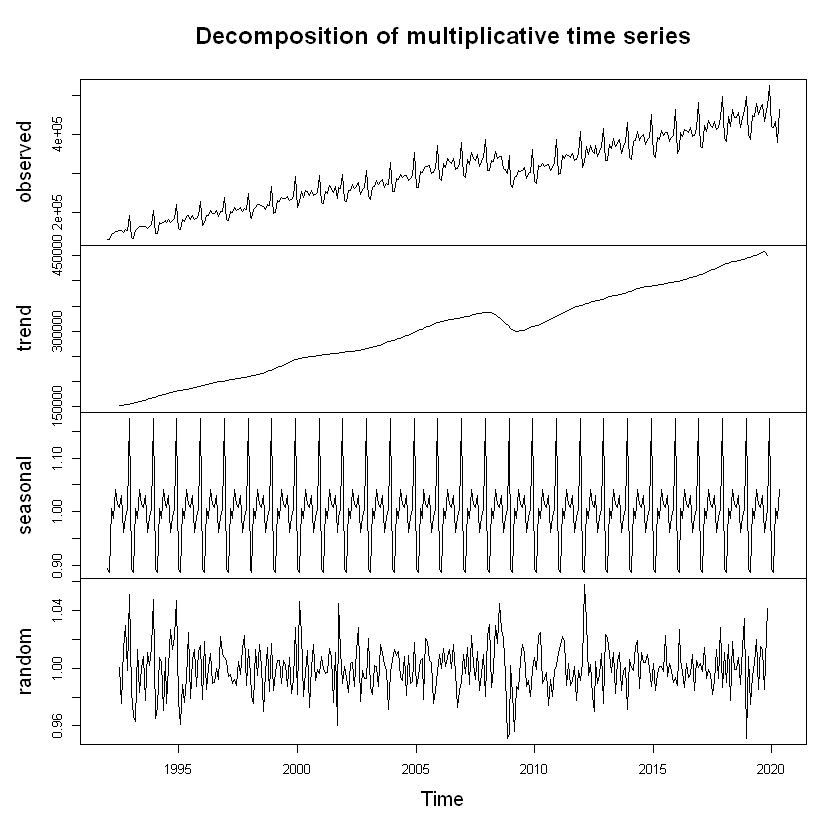

In [53]:
plot(retail_sales_ts_components)

In [66]:
install.packages("pracma")
library("pracma")

package 'pracma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpIBo95h\downloaded_packages


Warning message:
"package 'pracma' was built under R version 3.6.3"

In [72]:
print(retail_sales_ts)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1992 130683 131244 142488 147175 152420 151849 152586 152476 148158 155987
1993 137020 134462 153025 158615 163519 162964 164590 163989 159298 163992
1994 145276 146332 173562 170795 175527 178509 173198 182445 175128 178642
1995 158004 155156 181910 176635 190269 191609 182909 193370 182521 184276
1996 167372 173941 191851 191886 205797 196842 197140 204270 189424 201927
1997 181073 178428 203750 199219 211516 205491 208856 211952 201415 210145
1998 187445 183767 207973 212262 221155 220867 217687 216605 208915 220499
1999 196810 199451 230230 227109 237462 236830 236992 240478 230665 233193
2000 213709 227087 253717 239051 257581 255066 244445 257487 243624 245167
2001 226791 223971 253439 249062 268658 260315 251504 266460 236210 265188
2002 230546 228084 257133 257357 271682 260385 266795 277716 246350 259945
2003 242271 233478 264532 265990 281482 271242 279323 285212 265331 273781
2004 252818 253689 287944

In [71]:
retail_sales_peaks<-findpeaks(retail_sales_values)
print(retail_sales_peaks)

         [,1] [,2] [,3] [,4]
  [1,] 152420    5    1    6
  [2,] 152586    7    6    9
  [3,] 155987   10    9   11
  [4,] 191347   12   11   14
  [5,] 163519   17   14   18
  [6,] 164590   19   18   21
  [7,] 206174   24   21   25
  [8,] 173562   27   25   28
  [9,] 178509   30   28   31
 [10,] 182445   32   31   33
 [11,] 221549   36   33   38
 [12,] 181910   39   38   40
 [13,] 191609   42   40   43
 [14,] 193370   44   43   45
 [15,] 227552   48   45   49
 [16,] 205797   53   49   54
 [17,] 204270   56   54   57
 [18,] 237478   60   57   62
 [19,] 203750   63   62   64
 [20,] 211516   65   64   66
 [21,] 211952   68   66   69
 [22,] 210145   70   69   71
 [23,] 249389   72   71   74
 [24,] 221155   77   74   81
 [25,] 220499   82   81   83
 [26,] 265618   84   83   85
 [27,] 230230   87   85   88
 [28,] 237462   89   88   90
 [29,] 240478   92   90   93
 [30,] 293013   96   93   97
 [31,] 253717   99   97  100
 [32,] 257581  101  100  103
 [33,] 257487  104  103  105
 [34,] 294197 

In [75]:
print(nrow(retail_sales_peaks))

[1] 109


In [79]:
install.packages("forecast")
library(forecast)

also installing the dependencies 'quadprog', 'fracdiff', 'lmtest', 'tseries', 'urca', 'RcppArmadillo'



package 'quadprog' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpIBo95h\downloaded_packages


Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [80]:
s<-findfrequency(retail_sales_ts) #findfrequency returns the period of the dominant frequency of a time series. For seasonal data, it will return the seasonal period. For cyclic data, it will return the average cycle length.
print(s)

[1] 4


In [83]:
install.packages("smooth")
library(smooth)

also installing the dependencies 'RcppParallel', 'lamW', 'statmod', 'greybox', 'nloptr'



package 'RcppParallel' successfully unpacked and MD5 sums checked
package 'lamW' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'greybox' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'smooth' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpIBo95h\downloaded_packages


Warning message:
"package 'smooth' was built under R version 3.6.3"Loading required package: greybox
Warning message:
"package 'greybox' was built under R version 3.6.3"Package "greybox", v0.6.0 loaded.
This is package "smooth", v2.6.0


In [107]:
retail_sales_ts_trend<-sma(retail_sales_ts)
print(retail_sales_ts_trend)

Time elapsed: 7.29 seconds
Model estimated: SMA(12)
Initial values were produced using backcasting.

Loss function type: MSE; Loss function value: 562632331.2678
Error standard deviation: 23789.74
Sample size: 341
Number of estimated parameters: 2
Number of degrees of freedom: 339
Information criteria:
     AIC     AICc      BIC     BICc 
7842.231 7842.266 7849.895 7849.998 


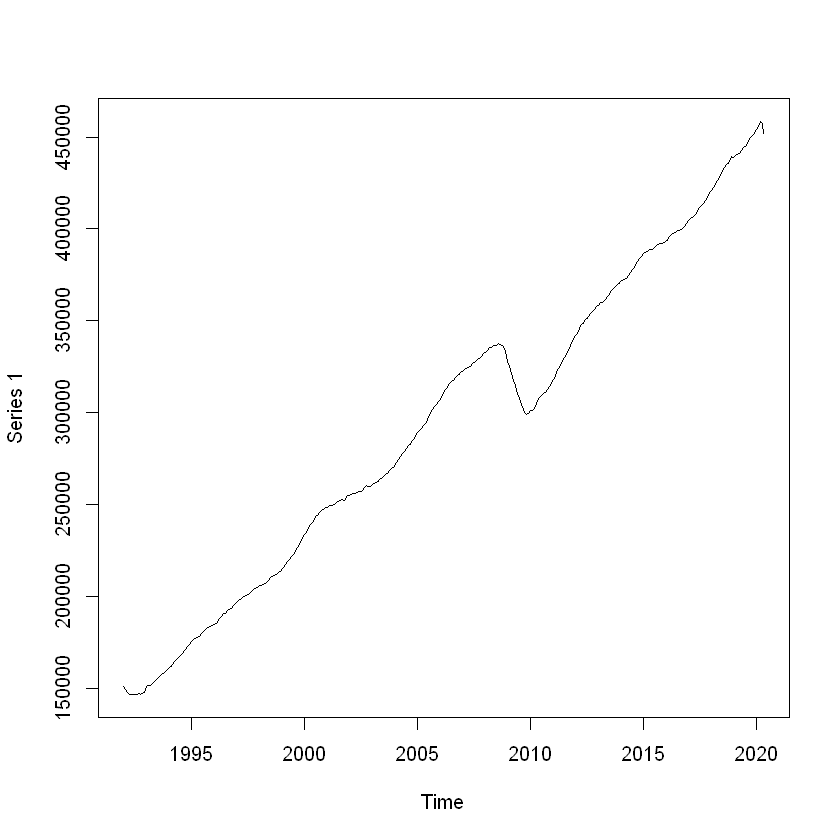

In [112]:
plot(retail_sales_ts_trend$fitted,type="l")

In [104]:
print(retail_sales_ts_trend$fitted)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1992 150936.4 149248.6 147607.6 146903.6 146590.1 146713.7 146789.8 146927.3
1993 150936.4 151464.5 151732.7 152610.7 153564.1 154489.0 155415.3 156415.6
1994 161469.0 162157.0 163146.2 164857.6 165872.6 166873.2 168168.7 168886.0
1995 175436.2 176496.9 177232.3 177927.9 178414.6 179643.1 180734.7 181544.0
1996 184801.3 185582.0 187147.4 187975.8 189246.8 190540.8 190976.8 192162.8
1997 196795.8 197937.5 198311.4 199303.0 199914.1 200390.7 201111.4 202087.7
1998 205730.6 206261.6 206706.5 207058.4 208145.3 208948.6 210229.9 210965.8
1999 215146.8 215927.2 217234.2 219089.0 220326.2 221685.2 223015.4 224624.2
2000 233590.8 234999.1 237302.1 239259.3 240254.5 241931.1 243450.7 244071.8
2001 248606.3 249696.5 249436.8 249413.7 250247.9 251171.0 251608.4 252196.7
2002 255189.0 255501.9 255844.7 256152.5 256843.7 257095.8 257101.6 258375.8
2003 260712.7 261689.8 262139.2 262755.8 263475.2 264291.9 265196.7 266240.7

In [106]:
retail_sales_detrended<-retail_sales_ts/retail_sales_ts_trend$fitted
print(retail_sales_detrended)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1992 0.8658149 0.8793648 0.9653162 1.0018477 1.0397700 1.0350019 1.0394865
1993 0.9077995 0.8877460 1.0085172 1.0393436 1.0648258 1.0548583 1.0590338
1994 0.8997145 0.9024094 1.0638436 1.0360154 1.0582038 1.0697281 1.0299065
1995 0.9006348 0.8790862 1.0263933 0.9927335 1.0664431 1.0666094 1.0120301
1996 0.9056861 0.9372730 1.0251330 1.0208014 1.0874533 1.0330704 1.0322718
1997 0.9201063 0.9014361 1.0274245 0.9995785 1.0580345 1.0254520 1.0385089
1998 0.9111188 0.8909415 1.0061270 1.0251310 1.0625028 1.0570399 1.0354711
1999 0.9147706 0.9236954 1.0598237 1.0366061 1.0777744 1.0683169 1.0626709
2000 0.9148861 0.9663314 1.0691731 0.9991293 1.0721173 1.0542920 1.0040840
2001 0.9122495 0.8969729 1.0160448 0.9985900 1.0735674 1.0364055 0.9995850
2002 0.9034324 0.8926900 1.0050356 1.0047023 1.0577715 1.0127939 1.0377027
2003 0.9292644 0.8921939 1.0091278 1.0123086 1.0683432 1.0262970 1.0532674
2004 0.9298395 0.9300365 

In [110]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [111]:
retail_sales_detrended %>% group_by(month=floor_date(date, "month")) %>%
   summarize(amount=sum(amount))

ERROR: Error in UseMethod("group_by_"): no applicable method for 'group_by_' applied to an object of class "ts"
